# Phân loại với KNN

In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
array_link = link.split('/')
array_link

['https:',
 '',
 'drive.google.com',
 'file',
 'd',
 '1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b',
 'view?usp=sharing']

In [ ]:
link = 'https://drive.google.com/file/d/1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)
df

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes
5,6,rainy,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rainy,mild,normal,weak,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14 non-null     int64 
 1   outlook      14 non-null     object
 2   temperature  14 non-null     object
 3   humidity     14 non-null     object
 4   wind         14 non-null     object
 5   play         14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1
5,5,1,0,1,0,0
6,6,0,0,1,0,1
7,7,2,2,0,1,0
8,8,2,0,1,1,1
9,9,1,2,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

y = df["play"].values
X = df.iloc[:, 1:-1] # trừ id ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

In [ ]:
y_train.size

8

In [ ]:
y_test.size

6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)

model_knn.fit(X_train, y_train) #training

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# y = ax+b : a,b : tham số

# LinearRegressor(n=1) n : siêu tham số

In [ ]:
model_knn.score(X_test, y_test)

0.5

In [ ]:
from sklearn import metrics

y_pred = model_knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[1, 1],
       [2, 2]])

<Axes: title={'center': 'Confusion matrix'}>

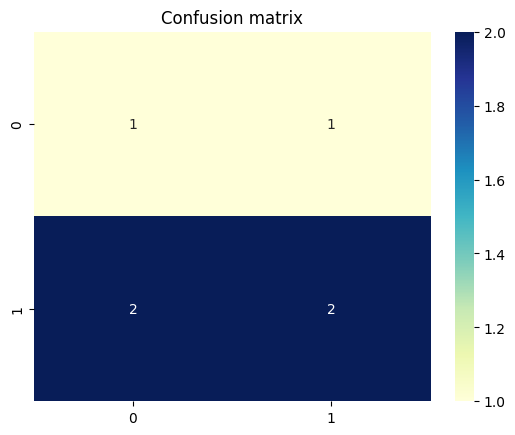

In [ ]:
# fig, ax = plt.subplot()
import seaborn as sns

fig, ax = plt.subplots()

plt.title('Confusion matrix')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu')

# CLASSSIFICATION VỚI WINE DATASET


In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [ ]:
y_train.size

124

In [ ]:
y_test.size

54

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)

model_knn.fit(X_train, y_train) #training

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model_knn.predict(X_test)
print('ACC: ', metrics.accuracy_score(y_test,y_pred))

ACC:  0.7222222222222222


In [ ]:
ac = {}

# k_max = can_bac_2 (tong so du lieu) / 2

for k in range(2, 20):
    model_knn = KNeighborsClassifier(n_neighbors = k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    acc_of_model_with_k = metrics.accuracy_score(y_test, y_pred)
    ac[k] = acc_of_model_with_k


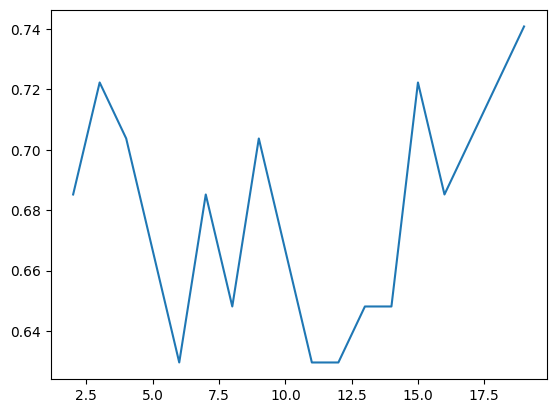

In [ ]:
plt.plot(list(ac.keys()), list(ac.values()))
plt.show()

# Classification sử dụng SVM

In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C= 1.0, gamma= 0.3)
model_svm.fit(X_train, y_train)

SVC(gamma=0.3, kernel='linear')

In [ ]:
y_pred = model_svm.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.935672514619883

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_params = {
    'C': [1, 1.1, 1.5],
    'gamma': [0.001, 0.1],
    'kernel': ['linear']
}

grids = GridSearchCV(SVC(), hyper_params)

In [ ]:
grids.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 1.1, 1.5], 'gamma': [0.001, 0.1],
                         'kernel': ['linear']})

In [ ]:
grids.best_params_

{'C': 1.5, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
y_pred = grids.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.9298245614035088


# BTVN: SVR

In [ ]:
link='https://drive.google.com/file/d/1SREflp4l3InNNBWr-wFh2VwLs1sLyTgK/view?usp=sharing'
# Nguồn data 'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Real%20estate.csv'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
